<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Network" data-toc-modified-id="Convolutional-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Convolutional Neural Network</a></span></li><li><span><a href="#Task-1:" data-toc-modified-id="Task-1:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 1:</a></span></li><li><span><a href="#Prepare-the-data." data-toc-modified-id="Prepare-the-data.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare the data.</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task 2</a></span></li></ul></div>

## Convolutional Neural Network 




Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:

In [ ]:
from tensorflow import keras

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')



ModuleNotFoundError: ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

# train = "/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/train"
# val =   "/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/val"
# test =  "/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/test"

# train = "Cats_and_Dogs/train"
# val =   "Cats_and_Dogs/val"
# test =  "Cats_and_Dogs/test"

train = "train"
val =   "val"
test =  "test"

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 

# input shape
input_shape = (img_width, img_height, 3)


# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20_000
# validation set size 
nb_validation_samples = 1500
# test set size
nb_test_samples = 1500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# use generator for training the model ("fit" method analog)
"""
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
"""

'\nmodel.fit_generator(\n    train_generator,\n    steps_per_epoch=nb_train_samples // batch_size,\n    epochs=10,\n    validation_data=val_generator,\n    validation_steps=nb_validation_samples // batch_size)\n'

## 1.1 Build and fit CNN with 3 convolutional layers for binary classification

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [ ]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(
    Conv2D(
        filters=16, 
        kernel_size=(3, 3), 
        input_shape=(150, 150, 3),
    )
)
model.add(Activation('relu'))
#   ~~~~~~~~~~
# 2: + Pooling with filter size 2x2.
model.add(
    MaxPooling2D(
        pool_size=(2, 2),
    )
)
#   ~~~~~~~~~~
# 3.1: Convolutional layer with 32 neurons, filter size 3x3.
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
# 3.2 Activation function - 'relu'
model.add(Activation("relu"))
#   ~~~~~~~~~~
# 4:  +Pooling with filter size 2x2.
model.add(
    MaxPooling2D(
        pool_size=(2, 2),
    )
)
#   ~~~~~~~~~~
# 5:  +Convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
#     +Relu
model.add(Activation("relu"))
#   ~~~~~~~~~~
# 6:  +Pooling layer with filter size 2x2.
model.add(
    MaxPooling2D(
        pool_size=(2, 2),
    )
)
#   ~~~~~~~~~~
# 7:  +Flattening model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
# https://keras.io/api/layers/reshaping_layers/flatten/
model.add(
    Flatten()
)
#   ~~~~~~~~~~
# 8:  +Dense - A fully connected layer with 64 neurons. Activation function - 'relu'
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(units=64))
#     +ReLu
model.add(Activation("relu"))
#   ~~~~~~~~~~
# 9:  +Dropout Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
model.add(Dropout(0.5))
#   ~~~~~~~~~~
# 10: +Dense A fully connected layer with 1 neuron.
model.add(Dense(units=1))
#     +Sigmoid Activation function - 'sigmoid', because binary classification model.
model.add(Activation("sigmoid"))

A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH
history_1 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs = 10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 187s 597ms/step - loss: 0.6012 - accuracy: 0.6675 - val_loss: 0.5251 - val_accuracy: 0.7493
Epoch 2/10
312/312 [==============================] - 203s 649ms/step - loss: 0.5045 - accuracy: 0.7540 - val_loss: 0.4636 - val_accuracy: 0.7887
Epoch 3/10
312/312 [==============================] - 190s 608ms/step - loss: 0.4492 - accuracy: 0.7907 - val_loss: 0.4376 - val_accuracy: 0.7914
Epoch 4/10
312/312 [==============================] - 219s 701ms/step - loss: 0.4066 - accuracy: 0.8180 - val_loss: 0.3871 - val_accuracy: 0.8207
Epoch 5/10
312/312 [==============================] - 195s 624ms/step - loss: 0.3592 - accuracy: 0.8406 - val_loss: 0.3824 - val_accuracy: 0.8356
Epoch 6/10
312/312 [==============================] - 202s 647ms/step - loss: 0.3259 - accuracy: 0.8603 - val_loss: 0.3861 - val_accuracy: 0.8363
Epoch 7/10
312/312 [==============================] - 206s 659ms/step - loss: 0.2760 - accuracy: 0.8812 - val_loss: 0.4026 -

## 1.2 Evaluating accuracy on test data

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 85.46%


## 1.3 Plots for `Loss(number_of_epochs)` and `Accuracy(number_of_epochs)`

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

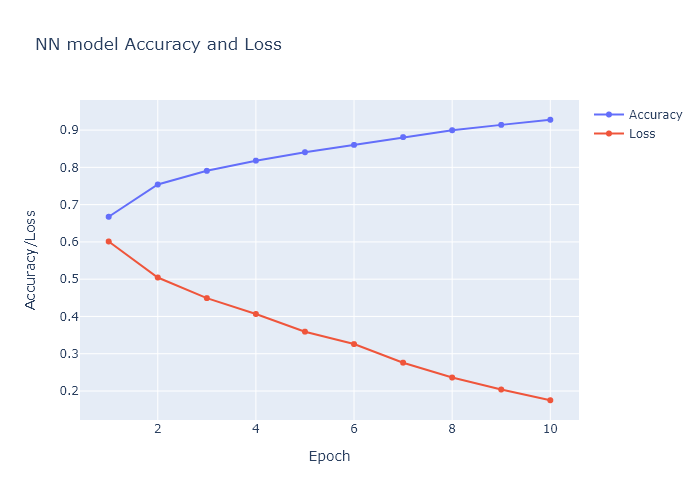

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='notebook'

X = list(range(1, len(history_1.history['accuracy'])+1))

fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=history_1.history['accuracy'], name='Accuracy'))
fig.add_scatter(x=X, y=history_1.history['loss'], name='Loss')
fig.update_layout(xaxis_title='Epoch', yaxis_title='Accuracy/Loss', legend_title='')
fig.update_layout(title_text="NN model Accuracy and Loss", legend_title="")
fig.show('png')

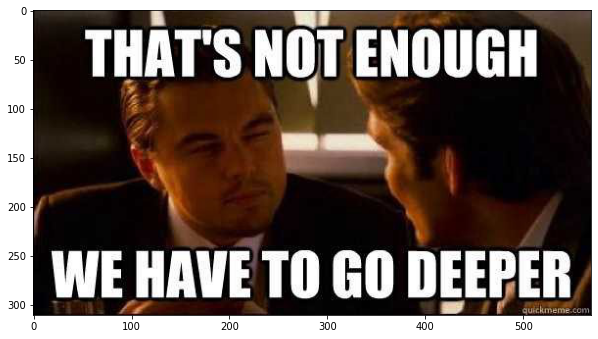

<Figure size 720x1440 with 1 Axes>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("/content/drive/My Drive/Deeper.jpeg")
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

## 2.1 Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application

In [ ]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:
vgg16_net = VGG16(
    weights="imagenet", 
    include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
    input_shape=(150, 150, 3)
)

vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [ ]:
# add layers to VGG16:
model_VGG = Sequential()
model_VGG.add(vgg16_net)

# + flattening
model_VGG.add(
    Flatten()
)
# + Dense fullyconnected layer with 256 neurons + relu
model_VGG.add(
    Dense(25, activation="relu")
)

# + Dropout
model_VGG.add(
    Dropout(0.5)
)
# + Dense - fully connected layer with 1 neuron + sigmoid
model_VGG.add(
    Dense(1, activation="sigmoid")
)

model_VGG.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 25)                204825    
                                                                 
 dropout_6 (Dropout)         (None, 25)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 14,919,539
Trainable params: 204,851
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model_VGG.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=1e-5), 
    metrics=["accuracy"],
)

E.g., it was like:

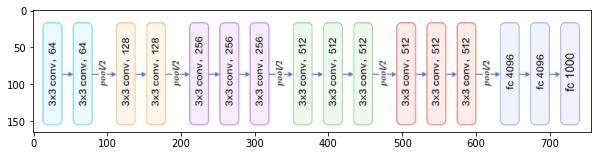

<Figure size 720x1440 with 1 Axes>

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

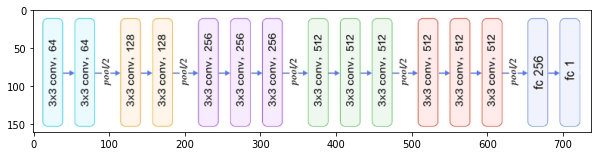

<Figure size 720x1440 with 1 Axes>

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [ ]:

"""
I cannot use GPU, case I traied TSNE for a week :/
"""
history_2 = model_VGG.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5
312/312 [==============================] - 1345s 4s/step - loss: 0.6141 - accuracy: 0.6590 - val_loss: 0.4878 - val_accuracy: 0.8159
Epoch 2/5
312/312 [==============================] - 1326s 4s/step - loss: 0.4691 - accuracy: 0.7905 - val_loss: 0.3870 - val_accuracy: 0.8526
Epoch 3/5
312/312 [==============================] - 1288s 4s/step - loss: 0.4070 - accuracy: 0.8175 - val_loss: 0.3446 - val_accuracy: 0.8662
Epoch 4/5
312/312 [==============================] - 1235s 4s/step - loss: 0.3744 - accuracy: 0.8407 - val_loss: 0.3252 - val_accuracy: 0.8702
Epoch 5/5
312/312 [==============================] - 1278s 4s/step - loss: 0.3518 - accuracy: 0.8501 - val_loss: 0.3044 - val_accuracy: 0.8798


In [ ]:
scores = model_VGG.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 86.62%


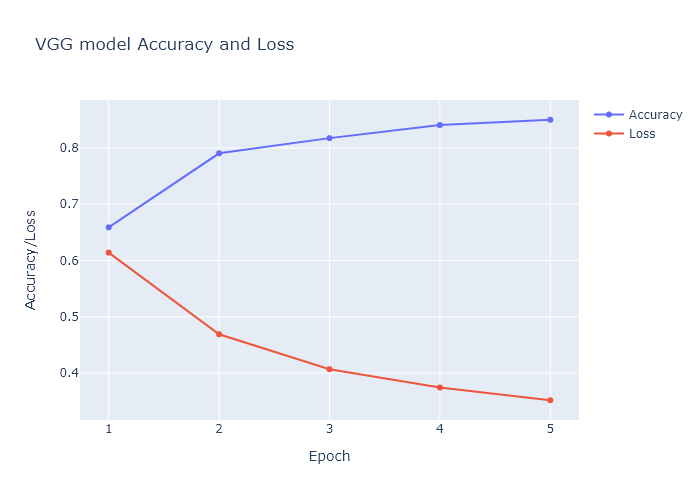

In [ ]:
X = list(range(1, len(history_2.history["accuracy"])+1))

fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=history_2.history["accuracy"], name="Accuracy"))
fig.add_scatter(x=X, y=history_2.history["loss"], name="Loss")
fig.update_layout(xaxis_title="Epoch", yaxis_title="Accuracy/Loss", legend_title="")
fig.update_layout(title_text="VGG model Accuracy and Loss", legend_title="")
fig.show("png")

## 2.2 Build and fit Transfer Learning model using pre-trained one from keras application
> I've choose [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function)
> ```py
> tf.keras.applications.ResNet50(
>       include_top=True,
>       weights="imagenet",
>       input_tensor=None,
>       input_shape=None,
>       pooling=None,
>       classes=1000,
>       **kwargs
>)
> ```

In [ ]:
from keras.applications import ResNet50

model_RN50 = ResNet50(
  weights="imagenet", 
  include_top=False,     
  input_shape=(150, 150, 3)
)

model_RN50.trainable = False              
# model_ResNet50.summary()

# ~~~~~~~~~~
# ~~~~~~~~~~

pretrnd_RN50 = Sequential()
pretrnd_RN50.add(model_RN50)
# + Flattening model.add (Flatten ())
pretrnd_RN50.add(Flatten())
# + Dense - A fully connected layer with 256 neurons
pretrnd_RN50.add(Dense(256))
# + ReLu Activation function
pretrnd_RN50.add(Activation("relu"))
# + Dropout excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
pretrnd_RN50.add(Dropout(0.5))
# + Dense layer with 1 neuron
pretrnd_RN50.add(Dense(1))
# + Sigmoid Activation function
pretrnd_RN50.add(Activation("sigmoid"))

pretrnd_RN50.summary()  

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 51200)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               13107456  
                                                                 
 activation_11 (Activation)  (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
 activation_12 (Activation)  (None, 1)                

In [ ]:
pretrnd_RN50.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.00001), 
    metrics=["accuracy"]
)

In [ ]:
gnrtr_RN50 = pretrnd_RN50.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5
312/312 [==============================] - 613s 2s/step - loss: 0.6851 - accuracy: 0.5738 - val_loss: 0.6480 - val_accuracy: 0.6345
Epoch 2/5
312/312 [==============================] - 607s 2s/step - loss: 0.6460 - accuracy: 0.6292 - val_loss: 0.6365 - val_accuracy: 0.6264
Epoch 3/5
312/312 [==============================] - 633s 2s/step - loss: 0.6314 - accuracy: 0.6478 - val_loss: 0.6189 - val_accuracy: 0.6719
Epoch 4/5
312/312 [==============================] - 640s 2s/step - loss: 0.6207 - accuracy: 0.6593 - val_loss: 0.6198 - val_accuracy: 0.6624
Epoch 5/5
312/312 [==============================] - 619s 2s/step - loss: 0.6135 - accuracy: 0.6682 - val_loss: 0.6009 - val_accuracy: 0.6929


In [ ]:
scores = pretrnd_RN50.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 68.68%


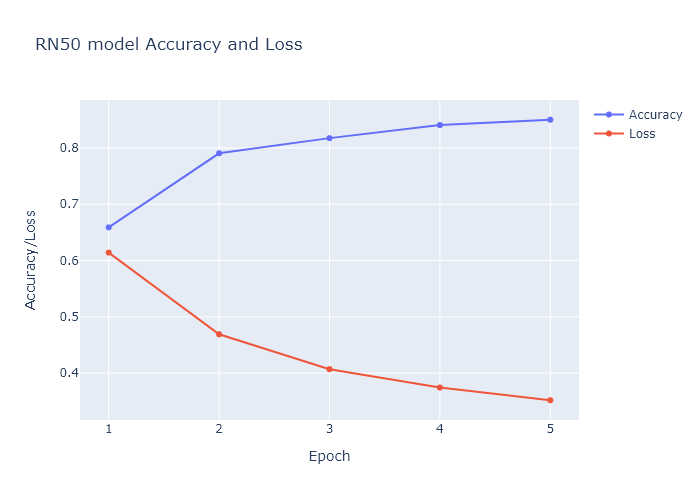

In [ ]:
X = list(range(1, len(history_2.history["accuracy"])+1))

fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=history_2.history["accuracy"], name="Accuracy"))
fig.add_scatter(x=X, y=history_2.history["loss"], name="Loss")
fig.update_layout(xaxis_title="Epoch", yaxis_title="Accuracy/Loss", legend_title="")
fig.update_layout(title_text="RN50 model Accuracy and Loss", legend_title="")
fig.show("png")

## Cat (bred) predictions

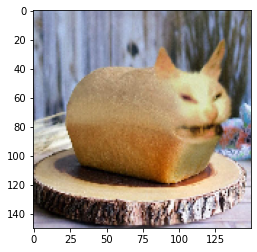

<Figure size 432x288 with 1 Axes>

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

onlycats = image.load_img(
    "random_cat.jpg", 
    target_size=(150, 150)
)
plt.imshow(onlycats)

In [ ]:
catIMGslice = image.img_to_array(onlycats)
catIMGslice = np.expand_dims(catIMGslice, axis=0)
catFeatures = np.vstack([catIMGslice])

In [ ]:
def isCat(modelname, PetPred, pred):
  catOrDog = ""
  if PetPred < 0.5:
      catOrDog = "cat"
  else:
      catOrDog = "dog"      
  print(f"Model {modelname}, predicted {pred} as a {catOrDog}")

In [ ]:
catPred = model.predict(
    catFeatures,
    batch_size=1
)

isCat("NN model", catPred, "cat")

catPred = model_VGG.predict(
    catFeatures,
    batch_size=1
)

isCat("VGG model", catPred, "cat")

catPred = pretrnd_RN50.predict(
    catFeatures,
    batch_size=1
)

isCat("Pretrained RN50", catPred, "cat")

1/1 [==============================] - 0s 19ms/step
Model NN model, predicted cat as a dog
1/1 [==============================] - 0s 92ms/step
Model VGG model, predicted cat as a cat
1/1 [==============================] - 0s 88ms/step
Model Pretrained RN50, predicted cat as a dog


## Dog (not bred) predictions

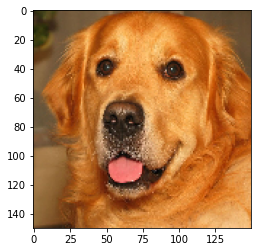

<Figure size 432x288 with 1 Axes>

In [ ]:
onlydogs = image.load_img(
    "random_dog.jpg", 
    target_size=(150, 150)
)
plt.imshow(onlydogs)

In [ ]:
dogIMGslice = image.img_to_array(onlydogs)
dogIMGslice = np.expand_dims(dogIMGslice, axis=0)
dogFeatures = np.vstack([dogIMGslice])

In [ ]:
dogPred = model.predict(
    dogFeatures,
    batch_size=1
)

isCat("NN model", dogPred, "dog")

dogPred = model_VGG.predict(
    dogFeatures,
    batch_size=1
)

isCat("VGG model", dogPred, "dog")

dogPred = pretrnd_RN50.predict(
    dogFeatures,
    batch_size=1
)

isCat("Pretrained RN50", dogPred, "dog")

1/1 [==============================] - 0s 19ms/step
Model NN model, predicted dog as a dog
1/1 [==============================] - 0s 97ms/step
Model VGG model, predicted dog as a dog
1/1 [==============================] - 0s 84ms/step
Model Pretrained RN50, predicted dog as a dog


## Conclusion
As a result of the work we build 3 models that can predict cat and dogs:
- Simple `CNN` with 3Convolutional layers;
- Pre-traied `VGG`,
- `ResNet50`.

For our research we use two classes `cats` & `dogs`, and for that task to predict who is who, VGG showed best performance, however `3Conv` also performed well.

Probably, if we have multiple clases, RN50 outperformed the models above.

> Just for fun, I've dicided to use ubnormal image of bred cat and only `VGG` predicted **cat** as a **cat**!

|Model|Accuracy on test data|
|:---:|:---:|
|3Conv | 85.46%|
|VGG  | 86.62%|
|RN50 | 68.68%|